<a href="https://colab.research.google.com/github/Hchama/Final_Thesis/blob/main/Resnet50_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytorch pytorch-cpu torchvision

  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement pytorch-cpu (from versions: none)
ERROR: No matching distribution found for pytorch-cpu


In [ ]:
!pip install fastai --upgrade
import fastai
from fastai.vision.all import *
from fastai.callback.tracker import  EarlyStoppingCallback
from fastai.callback.schedule import lr_find, LRFinder
from PIL import Image

# Increase the maximum limit
Image.MAX_IMAGE_PIXELS = None

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.0 MB/s eta 0:00:00


In [ ]:
path = '/content/drive/MyDrive/Proj'
data = ImageDataLoaders.from_folder(path, train='train', valid='validation', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=32)

In [ ]:
import os

# List first 10 files in the training directory
train_files = os.listdir('/content/drive/MyDrive/Proj/train')
print(train_files[:10])

# List first 10 files in the testing directory
test_files = os.listdir('/content/drive/MyDrive/Proj/validation')
print(test_files[:10])


['Authentic', 'Artificial']
['Authentic', 'Artificial']


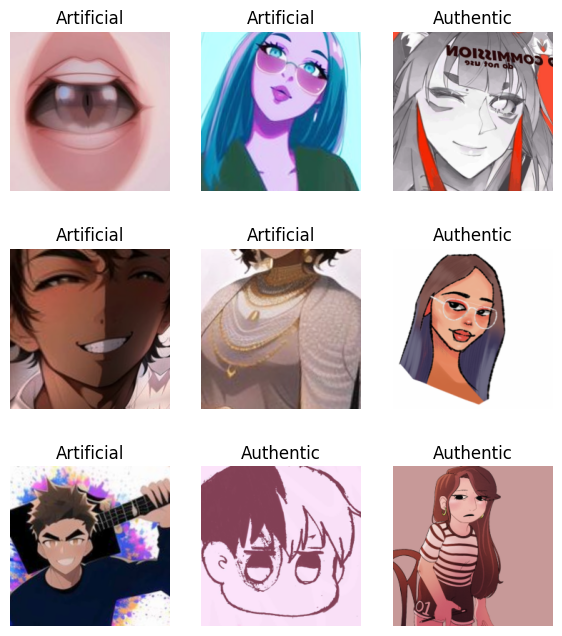

In [ ]:
data.show_batch(nrows=3, figsize=(7,8))

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 156MB/s]


epoch,train_loss,valid_loss,accuracy,recall_score,precision_score,f1_score,time
0,1.123803,0.742168,0.607143,0.904762,0.567164,0.697248,02:01
1,0.776226,0.543996,0.738095,0.904762,0.678571,0.775510,01:37
2,0.575316,0.426198,0.845238,0.880952,0.822222,0.850575,01:36
3,0.463798,0.493607,0.809524,0.904762,0.760000,0.826087,01:36
4,0.405804,0.529242,0.809524,0.880952,0.770833,0.822222,01:29
5,0.377105,0.644040,0.809524,0.857143,0.782609,0.818182,01:33


No improvement since epoch 2: early stopping


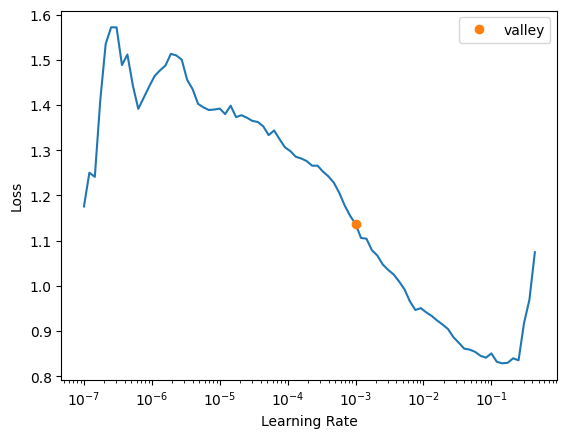

In [ ]:
learn = vision_learner(data, models.resnet50, opt_func=Adam, lr=0.001, metrics=[accuracy, Recall(), Precision(), F1Score()])

# Early stopping callback
early_stopping = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=3)
learn.add_cb(early_stopping)

learn.lr_find()

learn.fit_one_cycle(20, slice(1e-4, 1e-3))

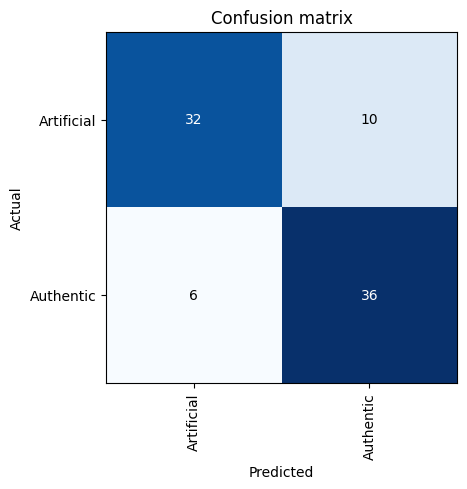

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
folder_path = "/content/drive/MyDrive/Proj/test/"

authentic_count = 0
artificial_count = 0
incorrect_authentic_count = 0
incorrect_artificial_count = 0
correct_count = 0
incorrect_count = 0

# Finds the numnber of correct/incorrect classified images
for file_name in os.listdir(folder_path):
    if file_name.endswith(".jpg") or file_name.endswith(".png"):
        img = PILImage.create(os.path.join(folder_path, file_name))

        pred_class, _, _ = learn.predict(img)

        print(f"File: {file_name}, Predicted Class: {pred_class}")

        true_class = "Artificial" if file_name.endswith("-ai.jpg") else "Authentic"
        if pred_class == true_class:
            correct_count += 1
            if true_class == "Authentic":
                authentic_count += 1
            else:
                artificial_count += 1
        else:
            incorrect_count += 1
            if true_class == "Authentic":
                incorrect_authentic_count += 1
            else:
                incorrect_artificial_count += 1

print(f"Number of images correctly predicted: {correct_count}")
print(f"Number of images incorrectly predicted: {incorrect_count}")
print(f"Number of authentic images: {authentic_count}")
print(f"Number of artificial images: {artificial_count}")
print(f"Number of incorrectly predicted authentic images: {incorrect_authentic_count}")
print(f"Number of incorrectly predicted artificial images: {incorrect_artificial_count}")


File: a8-ai.jpg, Predicted Class: Artificial


File: a14-ai.jpg, Predicted Class: Artificial


File: a9-ai.jpg, Predicted Class: Artificial


File: a23-ai.jpg, Predicted Class: Authentic


File: a12-ai.jpg, Predicted Class: Artificial


File: a33-ai.jpg, Predicted Class: Artificial


File: a17-ai.jpg, Predicted Class: Authentic


File: a6-ai.png, Predicted Class: Authentic


File: a34-ai.jpg, Predicted Class: Artificial


File: a10-ai.jpg, Predicted Class: Artificial


File: a28-ai.jpg, Predicted Class: Artificial


File: a7-ai.jpg, Predicted Class: Artificial


File: a24-ai.jpg, Predicted Class: Authentic


File: a19-ai.jpg, Predicted Class: Artificial


File: a18-ai.jpg, Predicted Class: Authentic


File: a1-ai.png, Predicted Class: Authentic


File: a26-ai.jpg, Predicted Class: Artificial


File: a4-ai.png, Predicted Class: Authentic


File: a37-ai.jpg, Predicted Class: Artificial


File: a40-ai.jpg, Predicted Class: Artificial


File: a16-ai.jpg, Predicted Class: Artificial


File: a30-ai.jpg, Predicted Class: Artificial


File: a31-ai.jpg, Predicted Class: Artificial


File: a22-ai.jpg, Predicted Class: Artificial


File: a39-ai.jpg, Predicted Class: Artificial


File: a11-ai.jpg, Predicted Class: Artificial


File: a3-ai.png, Predicted Class: Artificial


File: a20-ai.jpg, Predicted Class: Artificial


File: a41-ai.jpg, Predicted Class: Artificial


File: a35-ai.jpg, Predicted Class: Authentic


File: a2-ai.jpg, Predicted Class: Authentic


File: a21-ai.jpg, Predicted Class: Artificial


File: a25-ai.jpg, Predicted Class: Artificial


File: a15-ai.jpg, Predicted Class: Authentic


File: a36-ai.jpg, Predicted Class: Artificial


File: a6.jpg, Predicted Class: Authentic


File: a13.jpg, Predicted Class: Artificial


File: a29-ai.jpg, Predicted Class: Artificial


File: a13-ai.jpg, Predicted Class: Artificial


File: a4.jpg, Predicted Class: Artificial


File: a10.jpg, Predicted Class: Authentic


File: a9.jpg, Predicted Class: Authentic


File: a2.jpg, Predicted Class: Authentic


File: a27-ai.jpg, Predicted Class: Artificial


File: a42-ai.jpg, Predicted Class: Artificial


File: a17.jpg, Predicted Class: Authentic


File: a32-ai.jpg, Predicted Class: Authentic


File: a5-ai.jpg, Predicted Class: Authentic


File: a11.jpg, Predicted Class: Authentic


File: a38-ai.jpg, Predicted Class: Authentic


File: a16.jpg, Predicted Class: Authentic


File: a12.jpg, Predicted Class: Authentic


File: a14.jpg, Predicted Class: Authentic


File: a40.jpg, Predicted Class: Authentic


File: a7.jpg, Predicted Class: Authentic


File: a34.jpg, Predicted Class: Authentic


File: a39.jpg, Predicted Class: Authentic


File: a35.jpg, Predicted Class: Authentic


File: a36.jpg, Predicted Class: Authentic


File: a26.jpg, Predicted Class: Artificial


File: a29.jpg, Predicted Class: Artificial


File: a5.jpg, Predicted Class: Authentic


File: a18.jpg, Predicted Class: Authentic


File: a1.jpg, Predicted Class: Authentic


File: a38.jpg, Predicted Class: Authentic


File: a15.jpg, Predicted Class: Authentic


File: a21.jpg, Predicted Class: Authentic


File: a28.jpg, Predicted Class: Authentic


File: a30.jpg, Predicted Class: Artificial


File: a22.jpg, Predicted Class: Authentic


File: a24.jpg, Predicted Class: Artificial


File: a8.jpg, Predicted Class: Artificial


File: a20.jpg, Predicted Class: Authentic


File: a23.jpg, Predicted Class: Authentic


File: a19.jpg, Predicted Class: Authentic


File: a31.jpg, Predicted Class: Authentic


File: a32.jpg, Predicted Class: Authentic


File: a3.jpg, Predicted Class: Authentic


File: a25.jpg, Predicted Class: Artificial


File: a33.jpg, Predicted Class: Authentic


File: a37.jpg, Predicted Class: Artificial


File: a42.jpg, Predicted Class: Authentic


File: a41.jpg, Predicted Class: Authentic


File: a27.jpg, Predicted Class: Authentic
Number of images correctly predicted: 64
Number of images incorrectly predicted: 20
Number of authentic images: 36
Number of artificial images: 28
Number of incorrectly predicted authentic images: 10
Number of incorrectly predicted artificial images: 10


In [ ]:
#Testing results
TP = authentic_count
TN = artificial_count
FP = incorrect_authentic_count
FN = incorrect_artificial_count

Total = TP + TN + FP + FN

accuracy = (TP + TN) / Total

precision = TP / (TP + FP)

recall = TP / (TP + FN)

f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}")

Accuracy: 0.7619047619047619
precision: 0.782608695652174
recall: 0.782608695652174
f1_score: 0.782608695652174
